In [4]:
from sklearn_genetic import GASearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

In [5]:
data = load_digits() 

In [6]:
label_names = data['target_names'] 
y = data['target']
X = data['data'] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
clf = SGDClassifier(loss='hinge',fit_intercept=True)

## 1. Random Search

In [62]:
param_dist = {'bootstrap': [True, False],
              'max_depth': np.linspace(0, 1, num=10),
              'min_weight_fraction_leaf': np.power(10, np.arange(-4, 1, dtype=float))}

In [63]:
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs=-1)

In [64]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'min_weight_fraction_leaf': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])})

In [65]:
accuracy_score(y_test, random_search.predict(X_test))

0.6683501683501684

In [66]:
random_search.best_params_

{'min_weight_fraction_leaf': 0.01, 'max_depth': 1.0, 'bootstrap': True}

## 2. Grid Search

In [67]:
param_grid = {'bootstrap': [True, False],
              'max_depth': np.linspace(0, 1, num=10),
              'min_weight_fraction_leaf': np.power(10, np.arange(-4, 1, dtype=float))}

In [68]:
grid_search = GridSearchCV(clf, param_grid=param_grid,n_jobs=-1)

In [69]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'min_weight_fraction_leaf': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])})

In [70]:
accuracy_score(y_test, grid_search.predict(X_test))

0.6279461279461279

In [71]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 1.0, 'min_weight_fraction_leaf': 0.001}

## 3. Genetich Algorithm

In [72]:
clf = RandomForestClassifier()

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

evolved_estimator = GASearchCV(clf,
                    cv=3,
                    scoring='accuracy',
                    population_size=10,
                    generations=8,
                    tournament_size=3,
                    elitism=True,
                    param_grid=param_grid,
                    verbose=True)

In [73]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.818537	0.0932415  	0.934331   	0.679967   
1  	20    	0.860017	0.0595369  	0.934331   	0.759767   
2  	19    	0.897091	0.0422549  	0.934331   	0.80798    
3  	16    	0.927764	0.00734568 	0.939318   	0.918537   
4  	19    	0.933001	0.00825583 	0.94015    	0.916874   
5  	19    	0.939401	0.00198285 	0.940981   	0.934331   
6  	19    	0.941563	0.00189738 	0.945968   	0.939318   
7  	18    	0.942062	0.00117851 	0.943475   	0.94015    
8  	16    	0.942727	0.00101468 	0.944306   	0.941812   


In [74]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [75]:
accuracy_score(y_test,y_predicy_ga)

0.9410774410774411

In [76]:
evolved_estimator.best_params

AttributeError: 'GASearchCV' object has no attribute 'best_params'

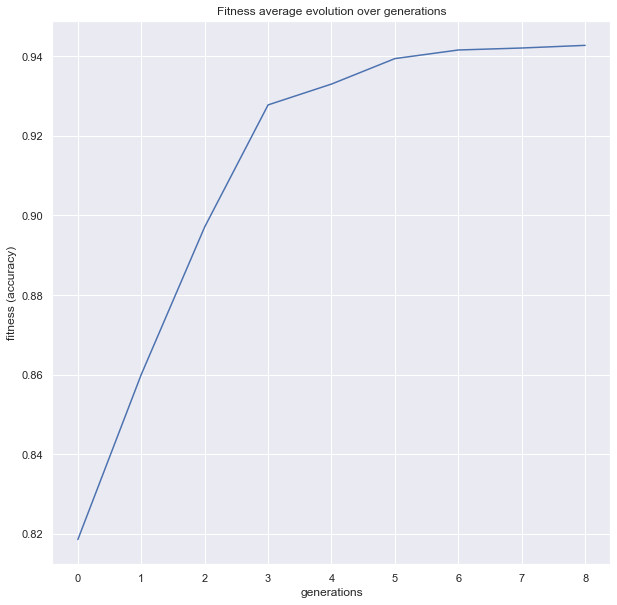

In [79]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()

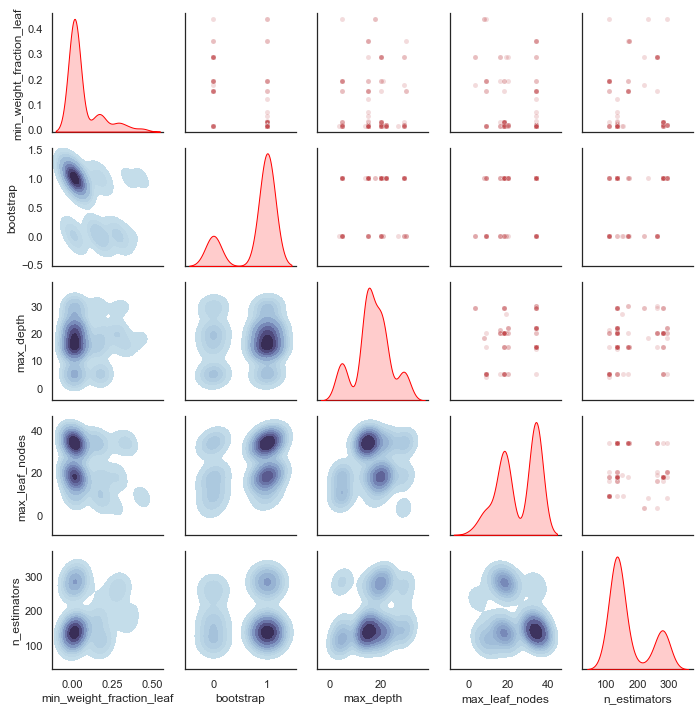

In [81]:
from sklearn_genetic.plots import plot_search_space
plot_search_space(evolved_estimator, features=['min_weight_fraction_leaf', 'bootstrap', 'max_depth', 'max_leaf_nodes', 'n_estimators'])
plt.show()